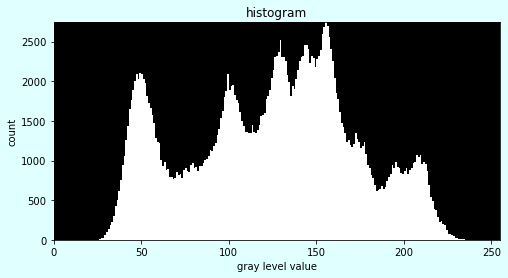

In [32]:
###homework 2
#import套件
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


#讀原圖檔案
image=Image.open("lena.bmp")

origin=np.zeros([512,512],np.int)
count= np.zeros(256,np.int)
for i in range(512):
    for j in range(512):
        origin[i, j] = image.getpixel((i,j))
        count[origin[i,j]]+=1
        
# generate a binary image (threshold at 128, (0-127,128-255))
image_binary=Image.new("L",(512,512))

for i in range(512):
    for j in range(512):
        if origin[i,j]>127:
            image_binary.putpixel((i,j),255)            
        else:
            image_binary.putpixel((i,j),0)

#image_binary.show(title="binary picture")
#image_binary.save("image_binary.bmp",'bmp')

# generate a histogram
x= np.linspace(0,255,256,dtype=np.int)
y= count[x]
#plt.hist(data) 製作簡單的直方圖
#https://kknews.cc/zh-tw/code/3ngaz5a.html
#https://www.happycoder.org/2017/10/13/python-data-science-and-machine-learning-matplotlib-tutorial/
ax = plt.figure(figsize=(8,4)) #固定大小
ax.set_facecolor('lightcyan') #固定外框顏色(填滿顏色)
plt.axes(facecolor='k') #內部為黑色背景
#https://matplotlib.org/devdocs/gallery/color/named_colors.html
plt.hist(origin.flatten(), bins = x, density=False, color='w')
#函式.flatten()將array、matrix轉乘 1D-array
#hist中的data必須為一維資料
#bins:直方圖的柱數，可選項
#density:是否將得到的直方圖向量歸一化。默認為0(false)
#color：顏色序列

plt.title('histogram')
plt.xlabel("gray level value")
plt.ylabel("count")
plt.xlim(0, 255)
plt.ylim(0, max(count))
plt.savefig("image_histogram.png")

